In [166]:
import os
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read relative file: https://www.kaggle.com/rtatman/reproducibility-tips-absolute-vs-relative-paths
df = pd.read_csv('C:/Users/maria/Documents/UFAL/Ciencia de dados/Projeto/data/APOSENTADOS_112020_FULL.csv',low_memory=False, error_bad_lines=False, sep=';')
#df = pd.read_csv(r'../datasets/APOSENTADOS_112020_FULL.csv', sep=';', low_memory=False)
df.describe()
print("\n")
df.head()

b'Skipping line 2244: expected 18 fields, saw 19\nSkipping line 21668: expected 18 fields, saw 19\nSkipping line 27415: expected 18 fields, saw 19\nSkipping line 31601: expected 18 fields, saw 19\nSkipping line 31615: expected 18 fields, saw 19\nSkipping line 31628: expected 18 fields, saw 19\nSkipping line 31651: expected 18 fields, saw 19\nSkipping line 31652: expected 18 fields, saw 19\nSkipping line 31661: expected 18 fields, saw 19\nSkipping line 31685: expected 18 fields, saw 19\nSkipping line 31704: expected 18 fields, saw 19\nSkipping line 31722: expected 18 fields, saw 19\nSkipping line 32853: expected 18 fields, saw 19\nSkipping line 34671: expected 18 fields, saw 19\nSkipping line 35164: expected 18 fields, saw 19\nSkipping line 35252: expected 18 fields, saw 19\nSkipping line 35697: expected 18 fields, saw 19\nSkipping line 35701: expected 18 fields, saw 19\nSkipping line 36267: expected 18 fields, saw 19\nSkipping line 36523: expected 18 fields, saw 19\nSkipping line 36613

,Nome,CPF,Matricula,Orgao,Sigla Orgao,Orgao vinculacao,Cargo emprego,Classe,Padrao,Referencia,Nivel,Tipo aposentadoria,Fund legal aposentadoria,Portaria aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria
0,ANTONIO ALVES BEZERRA ...,***686441**,130000000029,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE DE VIGILANCIA,S,II,0,0,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 63194 PUBLICADO EM 30DEZ1994 ...,30121994,NOMEACAO PARA CARGO ...,15061962,"2.596,79"
1,ANTONIO CARLOS CONCEICAO MARTINS ...,***423941**,130000000033,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,ESTATISTICO,S,III,0,0,VOLUNTARIA,CF 40 III A,PORTARIA NO. 26 PUBLICADO EM 31JAN1995 ...,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"10.664,04"
2,ARLINDA COSTA GUTEMBERG ...,***063691**,130000000048,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUXILIAR DE ENFERMAGEM,S,III,0,0,VOLUNTARIA,APOS. VOLUNTARIA C/PROVENTOS INTEGRAIS,PORTARIA NO. 341 PUBLICADO EM 01JUL1990 ...,01071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,"3.960,76"
3,BENTO MOREIRA LIMA JUNIOR ...,***460301**,130000000061,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AUDITOR FISCAL FEDERAL AGROPECUARIO,S,IV,0,0,APOSENTADORIA POR INVALIDEZ,CF 40 I INT,LEI NO. 21050 PUBLICADO EM 02JUL1990 ...,02071990,ADMISSAO SEM CONCURSO PUBLICO ...,08061961,"19.478,03"
4,BERENICE MOREIRA SANTOS ...,***021701**,130000000062,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",MAPA,0,AGENTE ADMINISTRATIVO,S,III,0,0,VOLUNTARIA,VOLUNTARIA (ART. 186 ITEM III ALINEA A),PORTARIA NO. 253 PUBLICADO EM 31MAI1990 ...,31051990,NOMEACAO PARA CARGO ...,21121961,"3.553,92"


In [99]:
#Tratamento dos dados
#Drop colunas que não vão ser usadas
aposentados = df.drop(['Nome', 'CPF', 'Matricula', 'Sigla Orgao', 'Orgao vinculacao', 'Padrao',
        'Referencia', 'Nivel', 'Fund legal aposentadoria', 'Portaria aposentadoria'], axis=1)

# Tirando datas vazias
aposentados.drop(aposentados[aposentados['Dt ocorrencia inatividade'] == '        '].index, inplace = True)
aposentados.drop(aposentados[aposentados['Dt ingresso servico publico'] == '        '].index, inplace = True)

# Transformando valor para float
aposentados['Valor aposentadoria                                                                                                                                                            '] = [float(str(val).replace(' ','').replace('.','').replace(',','.')) for val in aposentados['Valor aposentadoria                                                                                                                                                            '].values]

aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria
0,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE DE VIGILANCIA,S,VOLUNTARIA,30121994,NOMEACAO PARA CARGO ...,15061962,2596.79
1,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",ESTATISTICO,S,VOLUNTARIA,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,10664.04
2,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUXILIAR DE ENFERMAGEM,S,VOLUNTARIA,01071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,3960.76
3,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUDITOR FISCAL FEDERAL AGROPECUARIO,S,APOSENTADORIA POR INVALIDEZ,02071990,ADMISSAO SEM CONCURSO PUBLICO ...,08061961,19478.03
4,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE ADMINISTRATIVO,S,VOLUNTARIA,31051990,NOMEACAO PARA CARGO ...,21121961,3553.92


In [100]:
# Inserindo 0 nas datas com 7 dígitos
aposentados['Dt ocorrencia inatividade'] = aposentados['Dt ocorrencia inatividade'].str.zfill(8)
aposentados['Dt ingresso servico publico'] = aposentados['Dt ingresso servico publico'].str.zfill(8)
aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria
0,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE DE VIGILANCIA,S,VOLUNTARIA,30121994,NOMEACAO PARA CARGO ...,15061962,2596.79
1,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",ESTATISTICO,S,VOLUNTARIA,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,10664.04
2,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUXILIAR DE ENFERMAGEM,S,VOLUNTARIA,01071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,3960.76
3,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUDITOR FISCAL FEDERAL AGROPECUARIO,S,APOSENTADORIA POR INVALIDEZ,02071990,ADMISSAO SEM CONCURSO PUBLICO ...,08061961,19478.03
4,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE ADMINISTRATIVO,S,VOLUNTARIA,31051990,NOMEACAO PARA CARGO ...,21121961,3553.92


In [101]:
# Verificando quantas linhas das colunas de datas tem Nan
print(aposentados['Dt ocorrencia inatividade'].isnull().sum())
#print("\n")
print(aposentados['Dt ingresso servico publico'].isnull().sum())

0
0


In [102]:
aposentados = aposentados[aposentados['Dt ocorrencia inatividade'].notna()]

aposentados = aposentados[aposentados['Dt ingresso servico publico'].notna()]

In [103]:
# Verificando quantas linhas das colunas de datas tem Nan
print(aposentados['Dt ocorrencia inatividade'].isnull().sum())
#print("\n")
print(aposentados['Dt ingresso servico publico'].isnull().sum())
aposentados.head(5)

0
0


,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria
0,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE DE VIGILANCIA,S,VOLUNTARIA,30121994,NOMEACAO PARA CARGO ...,15061962,2596.79
1,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",ESTATISTICO,S,VOLUNTARIA,31011995,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,10664.04
2,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUXILIAR DE ENFERMAGEM,S,VOLUNTARIA,01071990,ADMISSAO SEM CONCURSO PUBLICO ...,15061962,3960.76
3,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AUDITOR FISCAL FEDERAL AGROPECUARIO,S,APOSENTADORIA POR INVALIDEZ,02071990,ADMISSAO SEM CONCURSO PUBLICO ...,08061961,19478.03
4,"MINIST.DA AGRICULTURA,PECUARIA E ABAST.",AGENTE ADMINISTRATIVO,S,VOLUNTARIA,31051990,NOMEACAO PARA CARGO ...,21121961,3553.92


In [104]:
# Remover string de data com len maior que 8
# https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
aposentados = aposentados[aposentados['Dt ocorrencia inatividade'].map(len) <= 8]

aposentados = aposentados[aposentados['Dt ingresso servico publico'].map(len) <= 8]

# Analisar colunas de datas
print(aposentados['Dt ocorrencia inatividade'])

0         30121994
1         31011995
2         01071990
3         02071990
4         31051990
            ...   
421398    18092015
421399    11121998
421400    21102015
421401    17012008
421402    10081976
Name: Dt ocorrencia inatividade, Length: 413042, dtype: object


In [105]:
# Ordenando os valores para remover datas fora do padrão
aposentados = aposentados.sort_values(by=['Dt ocorrencia inatividade'], ascending=True)
aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria
46565,MINISTERIO DA SAUDE,AGENTE DE PORTARIA,C,VOLUNTARIA,01011955,NOMEACAO PARA CARGO ...,01011950,2524.54
68845,MINISTERIO DA SAUDE,AGENTE ADMINISTRATIVO,S,APOSENTADORIA POR INVALIDEZ,01011965,ADMISSAO POR CONCURSO PUBLICO ...,01011955,3189.65
68387,MINISTERIO DA SAUDE,AGENTE ADMINISTRATIVO,S,APOSENTADORIA POR INVALIDEZ,01011965,ADMISSAO POR CONCURSO PUBLICO ...,01011955,1217.16
319151,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,MECANICO DE MOTOR A COMBUSTAO,S,VOLUNTARIA,01011967,ADMISSAO POR CONCURSO PUBLICO ...,30101954,3378.10
370063,FUND. INST. BRASIL. GEOG. E ESTATISTICA,TEC PLAN GEST INF INFOR GEOG ESTATIS,S,APOSENTADORIA POR INVALIDEZ,01011968,ADMISSAO SEM CONCURSO PUBLICO ...,01061946,4915.86


In [106]:
# Removendo valor discrepante
aposentados.drop(172987, inplace=True)
aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria
46565,MINISTERIO DA SAUDE,AGENTE DE PORTARIA,C,VOLUNTARIA,01011955,NOMEACAO PARA CARGO ...,01011950,2524.54
68845,MINISTERIO DA SAUDE,AGENTE ADMINISTRATIVO,S,APOSENTADORIA POR INVALIDEZ,01011965,ADMISSAO POR CONCURSO PUBLICO ...,01011955,3189.65
68387,MINISTERIO DA SAUDE,AGENTE ADMINISTRATIVO,S,APOSENTADORIA POR INVALIDEZ,01011965,ADMISSAO POR CONCURSO PUBLICO ...,01011955,1217.16
319151,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,MECANICO DE MOTOR A COMBUSTAO,S,VOLUNTARIA,01011967,ADMISSAO POR CONCURSO PUBLICO ...,30101954,3378.10
370063,FUND. INST. BRASIL. GEOG. E ESTATISTICA,TEC PLAN GEST INF INFOR GEOG ESTATIS,S,APOSENTADORIA POR INVALIDEZ,01011968,ADMISSAO SEM CONCURSO PUBLICO ...,01061946,4915.86


In [107]:
# Ordenando os valores
aposentados = aposentados.sort_values(by=['Dt ingresso servico publico'], ascending=True)
aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria
325141,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,AUX OPERAC DE SERV DIVERSOS,B,VOLUNTARIA,06111967,ADMISSAO POR CONCURSO PUBLICO ...,01011932,4039.27
317638,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,AGENTE SERVICOS ENGENHARIA,S,VOLUNTARIA,02011993,ADMISSAO POR CONCURSO PUBLICO ...,01011936,4337.91
23247,MINISTERIO DA ECONOMIA,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,S,VOLUNTARIA,26061979,ADMISSAO POR CONCURSO PUBLICO ...,01011937,24508.93
318727,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,ARTIFICE DE MECANICA,S,VOLUNTARIA,07031980,ADMISSAO POR CONCURSO PUBLICO ...,01011938,4920.03
317871,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,AUX OPERAC DE SERV DIVERSOS,B,VOLUNTARIA,01011993,ADMISSAO POR CONCURSO PUBLICO ...,01011938,3603.33


In [108]:
# Transformar data Dt ocorrencia inatividade; Dt ingresso servico publico; em tipo date %d%m%Y
aposentados['Dt ocorrencia inatividade'] = pd.to_datetime(aposentados['Dt ocorrencia inatividade'], format='%d%m%Y')
aposentados['Dt ingresso servico publico'] = pd.to_datetime(aposentados['Dt ingresso servico publico'],format='%d%m%Y')
aposentados.head(5)

,Orgao,Cargo emprego,Classe,Tipo aposentadoria,Dt ocorrencia inatividade,Nome ocorrencia,Dt ingresso servico publico,Valor aposentadoria
325141,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,AUX OPERAC DE SERV DIVERSOS,B,VOLUNTARIA,1967-11-06,ADMISSAO POR CONCURSO PUBLICO ...,1932-01-01,4039.27
317638,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,AGENTE SERVICOS ENGENHARIA,S,VOLUNTARIA,1993-01-02,ADMISSAO POR CONCURSO PUBLICO ...,1936-01-01,4337.91
23247,MINISTERIO DA ECONOMIA,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,S,VOLUNTARIA,1979-06-26,ADMISSAO POR CONCURSO PUBLICO ...,1937-01-01,24508.93
318727,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,ARTIFICE DE MECANICA,S,VOLUNTARIA,1980-03-07,ADMISSAO POR CONCURSO PUBLICO ...,1938-01-01,4920.03
317871,DEP.DE CENTRAL.SERV.DE INATIVOS E PENS.,AUX OPERAC DE SERV DIVERSOS,B,VOLUNTARIA,1993-01-01,ADMISSAO POR CONCURSO PUBLICO ...,1938-01-01,3603.33


In [174]:
#Coletando informações necessárias para os plots

# Tipos de aposentadorias apresentadas
tipo_aposentadoria = aposentados['Tipo aposentadoria'].value_counts()
print(tipo_aposentadoria.index)
print(tipo_aposentadoria.values)

Index(['VOLUNTARIA                 ', 'APOSENTADORIA POR INVALIDEZ',
       'COMPULSORIA                ', 'OUTROS                     '],
      dtype='object')
[375882  32402   4611    146]


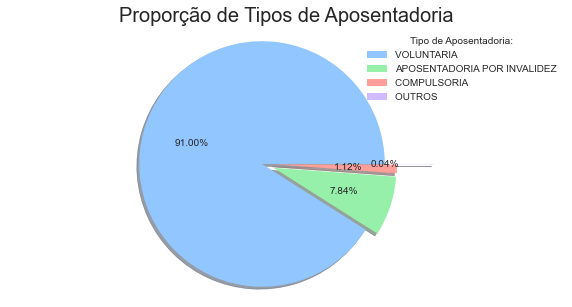

In [181]:
#Seleciona os valores dos salários
# Criando os gráficos
# Proporção de Tipos de Aposentadorias
plt.figure(figsize=(10,5))
plt.style.use('seaborn-pastel')
plt.title('Proporção de Tipos de Aposentadoria', size=20)
explode = (0, 0.1, 0.1, 0.4)
plt.pie(tipo_aposentadoria.values, shadow = True, explode=explode, autopct='%1.2f%%')
plt.legend(labels = tipo_aposentadoria.index, title = "Tipo de Aposentadoria:")
plt.axis('equal')
plt.savefig('../imagens/tipos_aposentadoria.png', dpi=450, bbox_inches='tight');
plt.show()

In [175]:

# Selecionando apenas os registros de aposentadoria por invalidez
tipo_invalidez = aposentados.loc[aposentados['Tipo aposentadoria'] == 'APOSENTADORIA POR INVALIDEZ']

anos_aposentadoria_invalidez = tipo_invalidez['Dt ocorrencia inatividade'] - tipo_invalidez['Dt ingresso servico publico']
anos_aposentadoria_invalidez = abs(anos_aposentadoria_invalidez/np.timedelta64(1,'Y'))
anos_aposentadoria_invalidez = anos_aposentadoria_invalidez.sort_values(ascending=True)


# Selecionando os cargos que tem registro de aposentadoria por invalidez e
# que pertence ao orgão ministério da saúde
tipo_invalidez_orgao_cargos = aposentados.loc[aposentados['Orgao'] == 'MINISTERIO DA SAUDE                     ']

#Selecionando os tipos de cargos que tem no Ministerio da Saude que se aposentaram por invalidez
tipo_cargos_invalidez = tipo_invalidez_orgao_cargos['Cargo emprego'].value_counts()

#Selecionando os Orgaos que tem aposentadoria por invalidez e contando sua ocorrencia
tipo_invalidez_orgao = tipo_invalidez['Orgao'].value_counts()

print(tipo_invalidez['Valor aposentadoria                                                                                                                                                            '].describe())
print(anos_aposentadoria_invalidez.describe())

count     32402.000000
mean       5321.604053
std        4659.073395
min           0.010000
25%        2590.692500
50%        3717.230000
75%        6101.717500
max      108920.190000
Name: Valor aposentadoria                                                                                                                                                            , dtype: float64
count    32402.000000
mean        20.811062
std          8.262170
min          0.000000
25%         15.129674
50%         21.106525
75%         26.524843
max         58.251709
dtype: float64


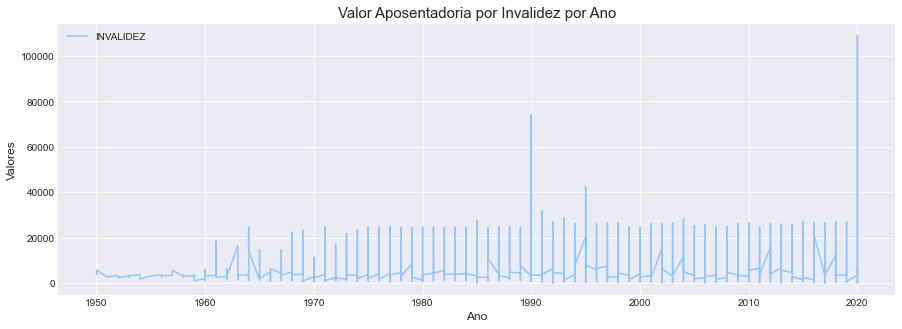

In [217]:
#plot data de aposentadoria X valor da aposentadoria por categoria
tipo_invalidez = tipo_invalidez.sort_values(by=['Dt ocorrencia inatividade'], ascending=True)

plt.figure(figsize=(15,5))
plt.style.use('seaborn-pastel')
plt.plot(pd.DatetimeIndex(tipo_invalidez['Dt ocorrencia inatividade']).year, tipo_invalidez['Valor aposentadoria                                                                                                                                                            '],label='INVALIDEZ')
plt.title('Valor Aposentadoria por Invalidez por Ano', size=15)
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.savefig('../imagens/valor_tipos_aposentadoria_invalidez.png', dpi=450, bbox_inches='tight');
plt.show()

In [176]:
# Selecionando apenas os registros de aposentadoria voluntaria
tipo_voluntaria = aposentados.loc[aposentados['Tipo aposentadoria'] == 'VOLUNTARIA                 ']

anos_aposentadoria_voluntaria = tipo_voluntaria['Dt ocorrencia inatividade'] - tipo_voluntaria['Dt ingresso servico publico']
anos_aposentadoria_voluntaria = abs(anos_aposentadoria_voluntaria/np.timedelta64(1,'Y'))
anos_aposentadoria_voluntaria = anos_aposentadoria_voluntaria.sort_values(ascending=True)


print(tipo_voluntaria['Valor aposentadoria                                                                                                                                                            '].describe())
print(anos_aposentadoria_voluntaria.describe())


count    375882.000000
mean       6534.536186
std        4333.392505
min           0.010000
25%        3637.872500
50%        5102.325000
75%        7761.070000
max       94436.720000
Name: Valor aposentadoria                                                                                                                                                            , dtype: float64
count    375882.000000
mean         28.117876
std           8.163432
min           0.000000
25%          22.992943
50%          29.155972
75%          33.892551
max          78.378064
dtype: float64


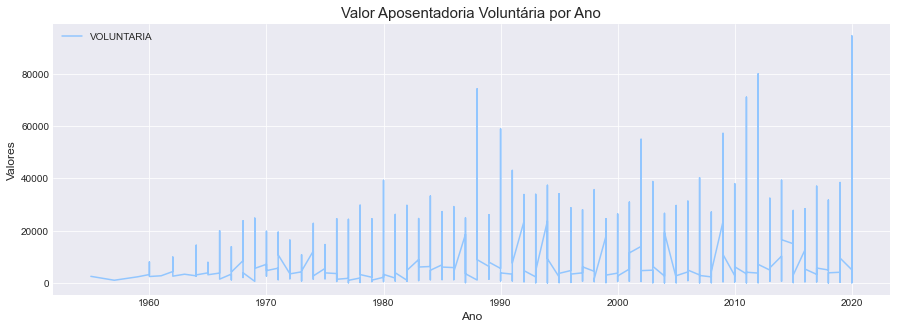

In [216]:
#plot data de aposentadoria X valor da aposentadoria por categoria
tipo_voluntaria = tipo_voluntaria.sort_values(by=['Dt ocorrencia inatividade'], ascending=True)
plt.figure(figsize=(15,5))
plt.style.use('seaborn-pastel')
plt.plot(pd.DatetimeIndex(tipo_voluntaria['Dt ocorrencia inatividade']).year, tipo_voluntaria['Valor aposentadoria                                                                                                                                                            '], label='VOLUNTARIA')
plt.title('Valor Aposentadoria Voluntária por Ano', size=15)
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.savefig('../imagens/valor_tipos_aposentadoria_voluntaria.png', dpi=450, bbox_inches='tight');
plt.show()

In [177]:
# Selecionando apenas os registros de aposentadoria compulsoria
tipo_compulsoria = aposentados.loc[aposentados['Tipo aposentadoria'] == 'COMPULSORIA                ']
anos_aposentadoria_compulsoria = tipo_compulsoria['Dt ocorrencia inatividade'] - tipo_compulsoria['Dt ingresso servico publico']
anos_aposentadoria_compulsoria = abs(anos_aposentadoria_compulsoria/np.timedelta64(1,'Y'))
anos_aposentadoria_compulsoria = anos_aposentadoria_compulsoria.sort_values(ascending=True)

print(tipo_compulsoria['Valor aposentadoria                                                                                                                                                            '].describe())
print(anos_aposentadoria_compulsoria.describe())


count     4611.000000
mean      4720.306398
std       3599.216733
min        365.820000
25%       2507.270000
50%       3572.280000
75%       5663.580000
max      27830.040000
Name: Valor aposentadoria                                                                                                                                                            , dtype: float64
count    4611.000000
mean       23.907129
std         9.097715
min         0.000000
25%        18.858703
50%        24.287973
75%        28.878074
max        55.741049
dtype: float64


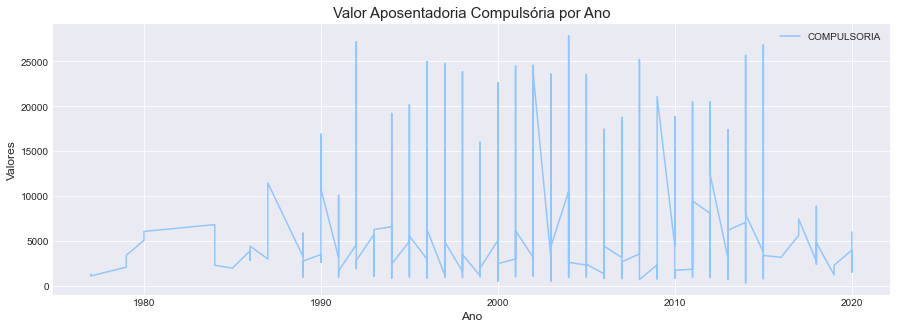

In [215]:
#plot data de aposentadoria X valor da aposentadoria por categoria
tipo_compulsoria = tipo_compulsoria.sort_values(by=['Dt ocorrencia inatividade'], ascending=True)
plt.figure(figsize=(15,5))
plt.style.use('seaborn-pastel')
plt.plot(pd.DatetimeIndex(tipo_compulsoria['Dt ocorrencia inatividade']).year, tipo_compulsoria['Valor aposentadoria                                                                                                                                                            '], label='COMPULSORIA')
plt.title('Valor Aposentadoria Compulsória por Ano', size=15)
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.savefig('../imagens/valor_tipos_aposentadoria_compulsoria.png', dpi=450, bbox_inches='tight');
plt.show()

In [178]:
# Selecionando apenas os registros de aposentadoria por outros motivos
tipo_outros = aposentados.loc[aposentados['Tipo aposentadoria'] == 'OUTROS                     ']
anos_aposentadoria_outros = tipo_outros['Dt ocorrencia inatividade'] - tipo_compulsoria['Dt ingresso servico publico']
anos_aposentadoria_outros = abs(anos_aposentadoria_outros/np.timedelta64(1,'Y'))
anos_aposentadoria_outros = anos_aposentadoria_outros.sort_values(ascending=True)

print(tipo_outros['Valor aposentadoria                                                                                                                                                            '].describe())
print(anos_aposentadoria_outros.describe())

count      146.000000
mean      5286.989589
std       3955.800959
min        180.570000
25%       2567.440000
50%       4107.650000
75%       6840.875000
max      19628.950000
Name: Valor aposentadoria                                                                                                                                                            , dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64


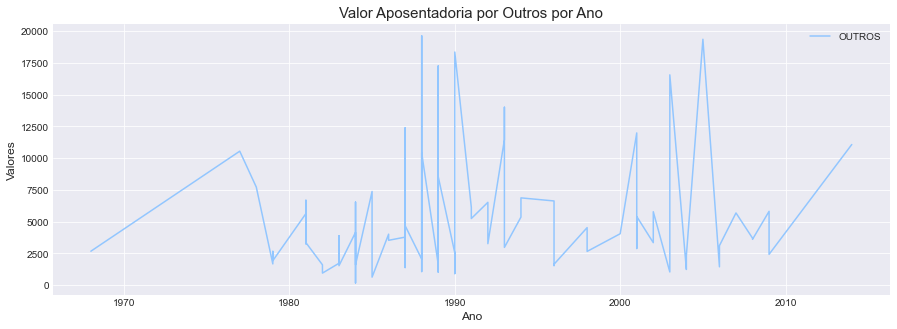

In [214]:
#plot data de aposentadoria X valor da aposentadoria por categoria
tipo_outros = tipo_outros.sort_values(by=['Dt ocorrencia inatividade'], ascending=True)
plt.figure(figsize=(15,5))
plt.style.use('seaborn-pastel')
plt.plot(pd.DatetimeIndex(tipo_outros['Dt ocorrencia inatividade']).year, tipo_outros['Valor aposentadoria                                                                                                                                                            '], label='OUTROS')
plt.title('Valor Aposentadoria por Outros por Ano', size=15)
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.savefig('../imagens/valor_tipos_aposentadoria_outros.png', dpi=450, bbox_inches='tight');
plt.show()

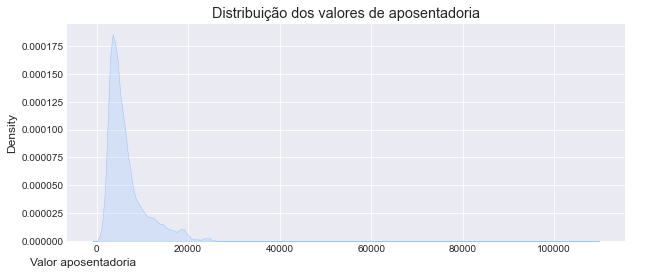

In [213]:
plt.figure(figsize=(10, 4))
plt.title('Distribuição dos valores de aposentadoria')
sns.kdeplot(aposentados['Valor aposentadoria                                                                                                                                                            '], shade=True)
plt.savefig('../imagens/distribuicao_valor_aposentadoria.png', dpi=450, bbox_inches='tight');
plt.show()

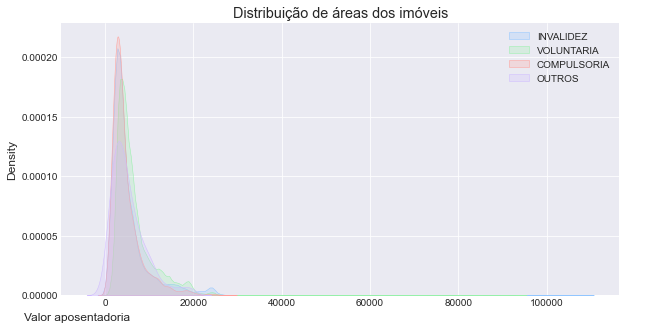

In [212]:
plt.figure(figsize=(10, 5))
plt.title('Distribuição de áreas dos imóveis')
sns.kdeplot(tipo_invalidez['Valor aposentadoria                                                                                                                                                            '], shade=True, label='INVALIDEZ')
sns.kdeplot(tipo_voluntaria['Valor aposentadoria                                                                                                                                                            '], shade=True, label='VOLUNTARIA')
sns.kdeplot(tipo_compulsoria['Valor aposentadoria                                                                                                                                                            '], shade=True,label='COMPULSORIA')
sns.kdeplot(tipo_outros['Valor aposentadoria                                                                                                                                                            '], shade=True, label='OUTROS')
plt.legend()
plt.savefig('../imagens/distribuicao_tipo_aposentadoria.png', dpi=450, bbox_inches='tight');
plt.show()

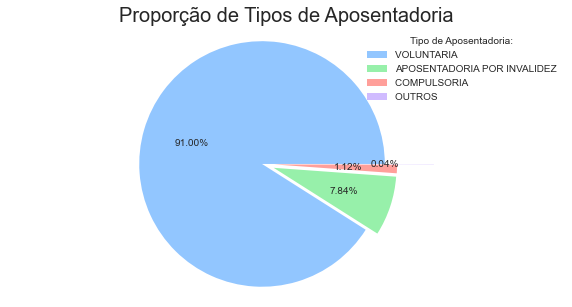

In [146]:
# #Seleciona os valores dos salários
# # Criando os gráficos
# # Proporção de Tipos de Aposentadorias
# plt.figure(figsize=(10,5))
# plt.style.use('seaborn-pastel')
# plt.title('Proporção de Tipos de Aposentadoria', size=20)
# explode = (0, 0.1, 0.1, 0.4)
# plt.pie(tipo_aposentadoria.values,explode=explode, autopct='%1.2f%%')
# plt.legend(labels = tipo_aposentadoria.index, title = "Tipo de Aposentadoria:")
# plt.axis('equal')
# plt.savefig('../imagens/tipos_aposentadoria.png', dpi=450, bbox_inches='tight');
# plt.show()

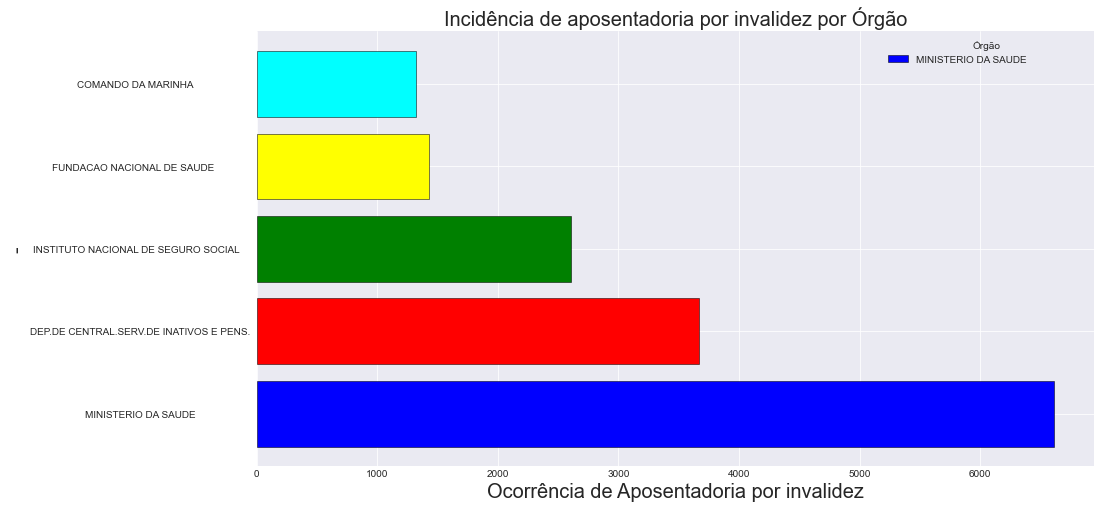

In [148]:
# Grafico que apresenta a quantidade de aposentadoria por invalidez
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
list_color = ['blue', 'red', 'green', 'yellow', 'cyan']
plt.barh(tipo_invalidez_orgao.index[:5],tipo_invalidez_orgao.values[:5], color=list_color, edgecolor='black')
#plt.title('Proporção de Orgãos com maior incidência de aposentadoria por invalidez', size=20)
plt.title('Incidência de aposentadoria por invalidez por Órgão', size=20)
#plt.legend(title = "Tipo de Aposentadoria:", labels = tipo_invalidez_orgao.index[:5])
plt.legend(title = "Órgão", labels = tipo_invalidez_orgao.index[:])
plt.xlabel('Ocorrência de Aposentadoria por invalidez', size=20)
plt.ylabel('-', size=20)
plt.savefig('../imagens/aposentadoria_invalidez.png', dpi=450, bbox_inches='tight');
plt.show()

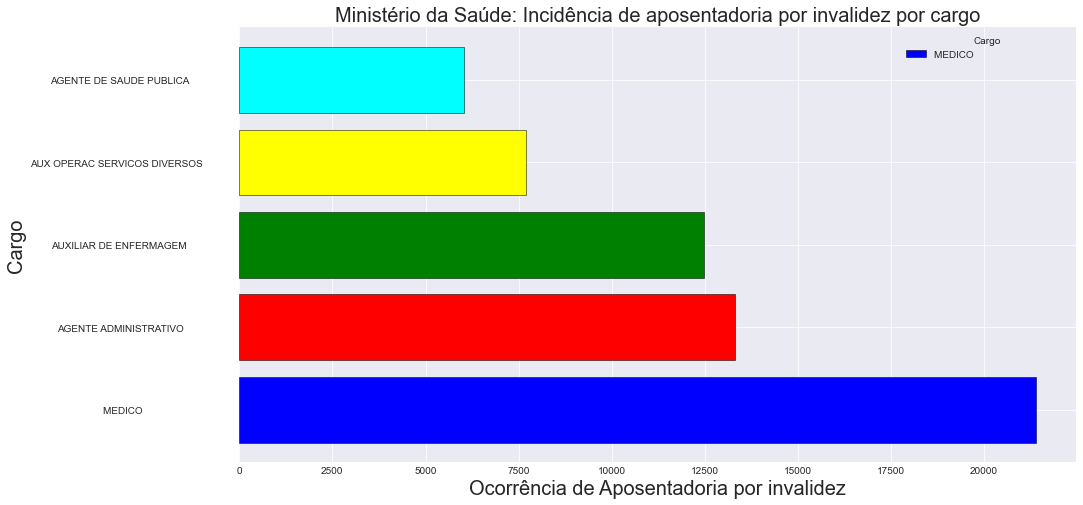

In [112]:
# Grafico que apresenta os cargos e a quantidade de pessoas aposentadas por invalidez que trabalham no Ministerio da Saude
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
list_color = ['blue', 'red', 'green', 'yellow', 'cyan']
plt.barh(tipo_cargos_invalidez.index[:5], tipo_cargos_invalidez.values[:5], color=list_color, edgecolor='black')
#plt.title('Proporção de Orgão com maior incidência de aposentadoria por invalidez', size=20)
plt.title('Ministério da Saúde: Incidência de aposentadoria por invalidez por cargo', size=20)
#plt.legend(title = "Tipo de Aposentadoria:", labels = tipo_cargos_invalidez.index[:5])
plt.legend(title = "Cargo", labels = tipo_cargos_invalidez.index[:5])
#plt.legend(title = "Cargo", labels = labels_cargo)
plt.xlabel('Ocorrência de Aposentadoria por invalidez', size=20)
plt.ylabel('Cargo', size=20)
plt.savefig('../imagens/maior_incidencia_invalidez.png', dpi=450, bbox_inches='tight')
plt.show()

In [113]:
print(aposentados.columns)

Index(['Orgao', 'Cargo emprego', 'Classe', 'Tipo aposentadoria',
       'Dt ocorrencia inatividade', 'Nome ocorrencia',
       'Dt ingresso servico publico',
       'Valor aposentadoria                                                                                                                                                            '],
      dtype='object')
